In [1]:
# Mthokozisi - Proposed Solution (SIR MODEL WITHOUT MESA)

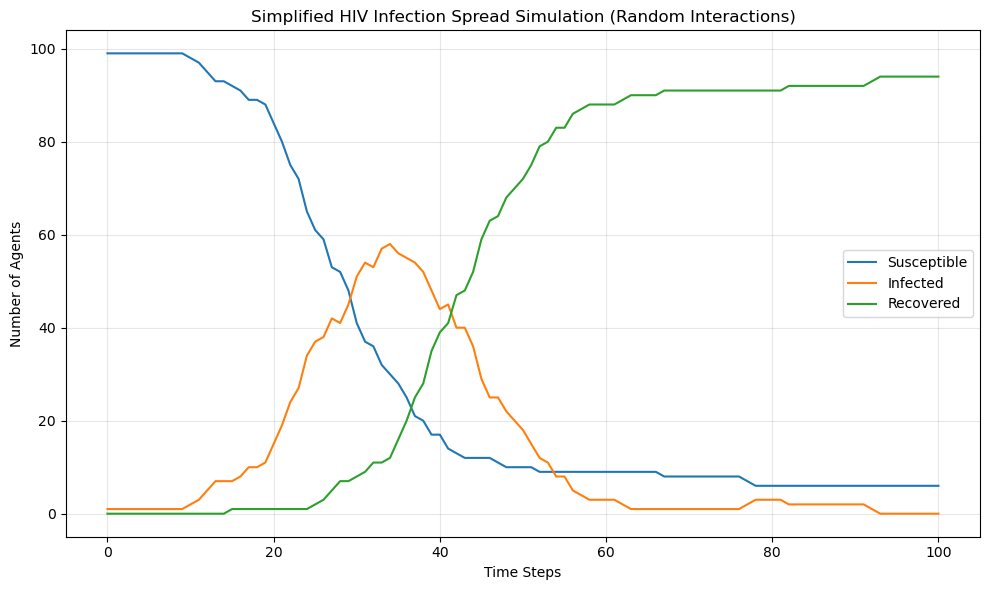

Final statistics after 100 steps:
Susceptible: 6 agents
Infected: 0 agents
Recovered: 94 agents


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Define the states of the agents
class State:
    SUSCEPTIBLE = 0
    INFECTED = 1
    RECOVERED = 2

# Define the agent class
class HIVAgent:
    """An agent in the HIV infection model."""

    def __init__(self, unique_id):
        self.unique_id = unique_id
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def interact_randomly(self, other_agents, ptrans, current_time):
        """Interact with a random agent and potentially infect them."""
        # If there are other agents, select one randomly to interact with
        if other_agents:
            chosen_agent = random.choice(other_agents)  # Select ONE random agent per step

            # Check if the chosen agent is susceptible and attempt infection
            if chosen_agent.state == State.SUSCEPTIBLE and self.state == State.INFECTED:
                if random.random() < ptrans:
                    chosen_agent.state = State.INFECTED
                    chosen_agent.infection_time = current_time

    def check_recovery(self, current_time, recovery_time):
        """Check if the agent recovers."""
        if self.state == State.RECOVERED:  # Already recovered, do nothing
            return
        if self.state == State.INFECTED:  # Only check recovery if infected
            if current_time - self.infection_time >= recovery_time:
                self.state = State.RECOVERED

# Define the model class
class HIVModel:
    """A simplified model for HIV infection spread with random interactions."""

    def __init__(self, N, ptrans, recovery_time, initial_infected_count=1):
        self.num_agents = N
        self.ptrans = ptrans
        self.recovery_time = recovery_time
        self.current_time = 0
        
        # Create agents
        self.agents = []
        for i in range(self.num_agents):
            agent = HIVAgent(i)
            self.agents.append(agent)

        # Infect a specified number of random agents at the start
        # Ensure we don't try to infect more agents than exist
        num_to_infect = min(initial_infected_count, N)
        initial_infected_agents = random.sample(self.agents, num_to_infect)
        for agent in initial_infected_agents:
            agent.state = State.INFECTED
            agent.infection_time = 0  # Infection starts at time 0
        
        # Initialize data collection
        self.data = []
        self._collect_data()

    def step(self):
        """Advance the model by one step."""
        self.current_time += 1
        
        # Randomly order agents for fairness
        random.shuffle(self.agents)
        
        # Each infected agent interacts with a random agent
        for agent in self.agents:
            if agent.state == State.INFECTED:
                other_agents = [a for a in self.agents if a != agent]
                agent.interact_randomly(other_agents, self.ptrans, self.current_time)
        
        # Check for recoveries
        for agent in self.agents:
            agent.check_recovery(self.current_time, self.recovery_time)
        
        # Collect data for this step
        self._collect_data()
    
    def _collect_data(self):
        """Collect data on the current state of the model."""
        susceptible = sum(1 for agent in self.agents if agent.state == State.SUSCEPTIBLE)
        infected = sum(1 for agent in self.agents if agent.state == State.INFECTED)
        recovered = sum(1 for agent in self.agents if agent.state == State.RECOVERED)
        
        self.data.append({
            'Step': self.current_time,
            'Susceptible': susceptible,
            'Infected': infected,
            'Recovered': recovered
        })
    
    def get_data(self):
        """Return the collected data as a pandas DataFrame."""
        return pd.DataFrame(self.data)

# Parameters
N = 100  # Number of agents
ptrans = 0.2  # Probability of transmission *per interaction* (adjusted)
recovery_time = 15  # Time until recovery (adjusted)
initial_infected_count = 1  # Number of agents initially infected

# Create the model
model = HIVModel(N, ptrans, recovery_time, initial_infected_count)

# Run the model
steps = 100  # Number of steps to run the simulation
for i in range(steps):
    model.step()

# Get the data for visualization
data = model.get_data()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Step'], data['Susceptible'], label='Susceptible')
plt.plot(data['Step'], data['Infected'], label='Infected')
plt.plot(data['Step'], data['Recovered'], label='Recovered')

plt.xlabel('Time Steps')
plt.ylabel('Number of Agents')
plt.title('Simplified HIV Infection Spread Simulation (Random Interactions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Final statistics after {steps} steps:")
print(f"Susceptible: {data['Susceptible'].iloc[-1]} agents")
print(f"Infected: {data['Infected'].iloc[-1]} agents")
print(f"Recovered: {data['Recovered'].iloc[-1]} agents")